In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

%matplotlib inline
# setting japanes font
font = {'family': 'IPAexGothic'}
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (20, 5)

## Read data

In [2]:
df = pd.read_csv('mathEnquete.csv')
df.head()

,タイムスタンプ,１．性別,２．ご年齢,２．ご職業,３．現在、数学・算数について触れる機会はありますか。,４．「３」について。具体的に触れるのはどういった機会の時ですか。,５．数学・算数は好きですか。,６．「５」で「かなり好き、まあまあ好き」と答えた方へ。数学・算数を好きになった時期はいつですか。,７．「５」で「まあまあ嫌い、かなり嫌い」と答えた方へ。数学・算数を嫌いになった時期はいつですか。,８．何をきっかけに数学・算数を好きに（嫌い）なりましたか。,９．好き（嫌い）になったきっかけについて、より具体的にお聞かせください,１０．数学・算数についての本を、今までに何冊くらい読んだ事がありますか。,１１．もし、自分のレベルに合わせて数学・算数について学ぶ機会を持てるのなら、再び学びたいと思いますか。,１２．「１１」で「かなり思う」「まあまあ思う」「あまり思わない」と答えた方へ。具体的にどの程度学びたいと思いますか。,１３．自分の子どもに、数学・算数を好きになってもらいたいと思いますか。,１４．数学で、一番楽しいと思える分野は何ですか。,１５．数学で、一番苦手な分野は何ですか。,１６．主に、どのような方法で数学を勉強していましたか。
0,5/16/2019 12:35:31,女性,30歳～34歳,アルバイト・パート,あまり無い方だ,独学で数学の本を読むくらい,まあまあ好き,社会人になってから,NaN,本や番組などがきっかけ,NaN,６～１０冊,かなり思う,週１回２時間以上,かなり思う,三角比・三角関数,計算問題,人から個別に聞いて
1,5/16/2019 12:38:02,男性,20歳～24歳,社会人,かなりある方だ,数学系イベント,かなり好き,小学校入学以前から,NaN,物心がついたときから・気が付いたら,NaN,１１冊～２０冊,かなり思う,隔週１回２時間程度～週１回２時間程度,かなり思う,整数,平面幾何,数学の本（教科書、参考書を除く）を読んで
2,5/16/2019 12:38:11,男性,20歳～24歳,大学・短大・専門学生,かなりある方だ,math channelで,かなり好き,小学校時代の算数の時から,NaN,物心がついたときから・気が付いたら,物心ついた時から,６～１０冊,かなり思う,NaN,かなり思う,自分で疑問に思った事を考える時、分野は関係ない,数Ⅲ,特にない
3,5/16/2019 12:38:22,女性,25歳～29歳,アルバイト・パート,ほとんど無い、まったく無い,NaN,まあまあ嫌い,NaN,高校生後半,学校の授業がきっかけ,NaN,０冊,まあまあ思う,隔週１回２時間程度～週１回２時間程度,まあまあ思う,方程式・不等式,微分・積分,"授業を聞いて, 問題集を解いて"
4,5/16/2019 12:40:34,女性,15歳～19歳,高校生,かなりある方だ,学校の授業や塾だけでなく、1日1問以上は解くようにしている,かなり好き,高校生前半,NaN,学校の先生がきっかけ,高校の数学の先生が好きだから,１１冊～２０冊,かなり思う,週１回２時間以上,かなり思う,特にない,特にない,"授業を聞いて, 問題集を解いて, 数学の本（教科書、参考書を除く）を読んで, 人から個別に聞いて"


カラム名まで日本語なのは流石に扱いにくいので、カラム名を置き換える。

In [3]:
en_cols = [
    'time stamp',
    'sex',
    'age',
    'profession',
    'opportunity',
    'what kind of occasion',
    'like',
    'when did you like',
    'when do you dislike',
    'what started you like or dislike',
    'how you became fond or dislike',
    'read books count',
    'learn again',
    'how much do you want to learn',
    'your child like for Math',
    'most fun',
    'most difficult',
    'study']

for jp, en in zip(df.columns, en_cols):
  print("{:<35} {}".format(en, jp))
df.columns = en_cols

time stamp                          タイムスタンプ
sex                                 １．性別
age                                 ２．ご年齢
profession                          ２．ご職業
opportunity                         ３．現在、数学・算数について触れる機会はありますか。
what kind of occasion               ４．「３」について。具体的に触れるのはどういった機会の時ですか。
like                                ５．数学・算数は好きですか。
when did you like                   ６．「５」で「かなり好き、まあまあ好き」と答えた方へ。数学・算数を好きになった時期はいつですか。
when do you dislike                 ７．「５」で「まあまあ嫌い、かなり嫌い」と答えた方へ。数学・算数を嫌いになった時期はいつですか。
what started you like or dislike    ８．何をきっかけに数学・算数を好きに（嫌い）なりましたか。
how you became fond or dislike      ９．好き（嫌い）になったきっかけについて、より具体的にお聞かせください
read books count                    １０．数学・算数についての本を、今までに何冊くらい読んだ事がありますか。
learn again                         １１．もし、自分のレベルに合わせて数学・算数について学ぶ機会を持てるのなら、再び学びたいと思いますか。
how much do you want to learn       １２．「１１」で「かなり思う」「まあまあ思う」「あまり思わない」と答えた方へ。具体的にどの程度学びたいと思いますか。
your child like for Math            １３．自分の子どもに、数学・算数を好きになってもらいたいと思いますか。
most fun    

Add columns

In [4]:
df['min_read_books_count'] = df['read books count'].replace(dict(np.stack([df['read books count'].unique(),
                                                     np.array([6,11,0,3,31,1,21])], 1)))

d = [(i, int(re.sub(r'\D', '', i))) if len(re.sub(r'\D', '', i))==2 else (i, int(re.sub(r'\D', '', i)[:2])) for i in df.age.unique()]
df['age_int'] = df['age'].replace(dict(d))

df['age_div_read_books_count'] = df['age_int'] / df['min_read_books_count']
df['age_div_read_books_count'] = df['age_div_read_books_count'].replace(np.inf, np.nan)

df['like_num'] = df.loc[:,['like']]

df['like_num'] = df['like_num'].replace('かなり好き', 4)
df['like_num'] = df['like_num'].replace('まあまあ好き', 3)
df['like_num'] = df['like_num'].replace('まあまあ嫌い', 2)
df['like_num'] = df['like_num'].replace('かなり嫌い', 1)

In [5]:
t = ['小学校入学以前から','小学校時代の算数の時から','中学生前半', '中学生後半',
     '高校生前半', '高校生後半','高校卒業後の進学先で（大学・専門学校など）','社会人になってから']
dict([(i, '{}_{}'.format(e, i)) for e,i in enumerate(t)])
df['when did you like'] = df['when did you like'].replace(dict([(i, '{}_{}'.format(e, i)) for e,i in enumerate(t)]))
df['when do you dislike'] = df['when do you dislike'].replace(dict([(i, '{}_{}'.format(e, i)) for e,i in enumerate(t)]))

In [6]:
df['profession'] = df['profession'].replace('高等専門学校生', '大学・短大・専門学生')
df['profession'] = df['profession'].replace({'ニート': '無職', 
                                             '浪人': '無職', 
                                             '浪人生': '無職',
                                             '退職後無職': '無職'})
df['profession'] = df['profession'].replace({'個人事業主': '社会人', 
                                             'フリーランス': '社会人',
                                             '自営業': '社会人', 
                                             'ポスドク': '社会人',})

In [7]:
age_order = ['～14歳','15歳～19歳','20歳～24歳','25歳～29歳',
            '30歳～34歳','35歳～39歳','40歳～44歳','45歳～49歳',
            '50歳～54歳','55歳～59歳','60歳～']
age_int_order = ['0～14','15～19','20～24','25～29',
                '30～34','35～39','40～44','45～49',
                '50～54','55～59','60～99']
like_order = ['かなり好き', 'まあまあ好き', 'まあまあ嫌い', 'かなり嫌い']
book_order = ['０冊', '１、２冊', '３～５冊', '６～１０冊', '１１冊～２０冊','２１冊～３０冊', '３１冊～']
units = set(np.hstack([df['most fun'].value_counts()[df['most fun'].value_counts().values>5].index,
                df['most difficult'].value_counts()[df['most difficult'].value_counts().values>5].index]))
units.remove('特にない')

In [8]:
df.head()

,time stamp,sex,age,profession,opportunity,what kind of occasion,like,when did you like,when do you dislike,what started you like or dislike,...,learn again,how much do you want to learn,your child like for Math,most fun,most difficult,study,min_read_books_count,age_int,age_div_read_books_count,like_num
0,5/16/2019 12:35:31,女性,30歳～34歳,アルバイト・パート,あまり無い方だ,独学で数学の本を読むくらい,まあまあ好き,7_社会人になってから,NaN,本や番組などがきっかけ,...,かなり思う,週１回２時間以上,かなり思う,三角比・三角関数,計算問題,人から個別に聞いて,6,30,5.000000,3
1,5/16/2019 12:38:02,男性,20歳～24歳,社会人,かなりある方だ,数学系イベント,かなり好き,0_小学校入学以前から,NaN,物心がついたときから・気が付いたら,...,かなり思う,隔週１回２時間程度～週１回２時間程度,かなり思う,整数,平面幾何,数学の本（教科書、参考書を除く）を読んで,11,20,1.818182,4
2,5/16/2019 12:38:11,男性,20歳～24歳,大学・短大・専門学生,かなりある方だ,math channelで,かなり好き,1_小学校時代の算数の時から,NaN,物心がついたときから・気が付いたら,...,かなり思う,NaN,かなり思う,自分で疑問に思った事を考える時、分野は関係ない,数Ⅲ,特にない,6,20,3.333333,4
3,5/16/2019 12:38:22,女性,25歳～29歳,アルバイト・パート,ほとんど無い、まったく無い,NaN,まあまあ嫌い,NaN,5_高校生後半,学校の授業がきっかけ,...,まあまあ思う,隔週１回２時間程度～週１回２時間程度,まあまあ思う,方程式・不等式,微分・積分,"授業を聞いて, 問題集を解いて",0,25,NaN,2
4,5/16/2019 12:40:34,女性,15歳～19歳,高校生,かなりある方だ,学校の授業や塾だけでなく、1日1問以上は解くようにしている,かなり好き,4_高校生前半,NaN,学校の先生がきっかけ,...,かなり思う,週１回２時間以上,かなり思う,特にない,特にない,"授業を聞いて, 問題集を解いて, 数学の本（教科書、参考書を除く）を読んで, 人から個別に聞いて",11,15,1.363636,4


In [9]:
print('{:>13}{:4} \nquestion cnt:{:4}'.format('sumple cnt:',df.shape[0], df.shape[1]-1))

  sumple cnt: 415 
question cnt:  21


In [10]:
print('Missing value')
df.isnull().sum()

Missing value


time stamp                            0
sex                                   0
age                                   0
profession                            0
opportunity                           0
what kind of occasion               102
like                                  0
when did you like                    80
when do you dislike                 326
what started you like or dislike      0
how you became fond or dislike      206
read books count                      0
learn again                           0
how much do you want to learn        28
your child like for Math              0
most fun                              0
most difficult                        0
study                                 0
min_read_books_count                  0
age_int                               0
age_div_read_books_count             89
like_num                              0
dtype: int64

In [11]:
# statistics
display(df.describe(include='number'))
display(df.describe(exclude='number'))

,min_read_books_count,age_int,age_div_read_books_count,like_num
count,415.000000,415.000000,326.000000,415.000000
mean,5.891566,26.392771,10.888571,3.113253
std,8.763137,11.010204,11.296935,0.886938
min,0.000000,14.000000,0.451613,1.000000
25%,1.000000,20.000000,2.500000,3.000000
50%,3.000000,25.000000,6.666667,3.000000
75%,6.000000,35.000000,15.000000,4.000000
max,31.000000,60.000000,55.000000,4.000000


,time stamp,sex,age,profession,opportunity,what kind of occasion,like,when did you like,when do you dislike,what started you like or dislike,how you became fond or dislike,read books count,learn again,how much do you want to learn,your child like for Math,most fun,most difficult,study
count,415,415,415,415,415,313,415,335,89,415,209,415,415,387,415,415,415,415
unique,415,3,11,8,4,263,4,8,8,33,209,7,4,4,4,39,39,37
top,5/17/2019 16:15:59,男性,20歳～24歳,社会人,かなりある方だ,授業,まあまあ好き,1_小学校時代の算数の時から,1_小学校時代の算数の時から,物心がついたときから・気が付いたら,国語と違ってはっきりと答えが出たとき,１、２冊,かなり思う,月１回２時間程度～隔週１回２時間程度,かなり思う,微分・積分,確率・組み合わせ,"授業を聞いて, 問題集を解いて"
freq,1,265,107,191,169,16,174,148,23,127,1,102,224,111,272,73,67,115


## Quick EDA

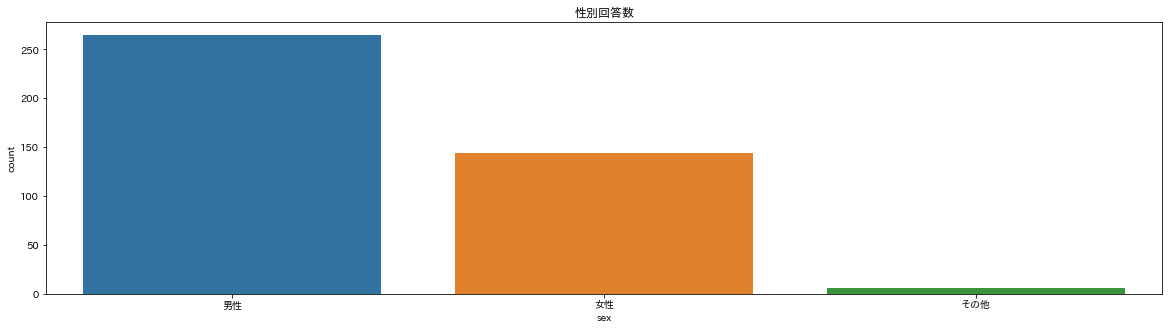

In [30]:
plt.title('性別回答数')
sns.countplot(x="sex", data=df, order=['男性','女性','その他'])

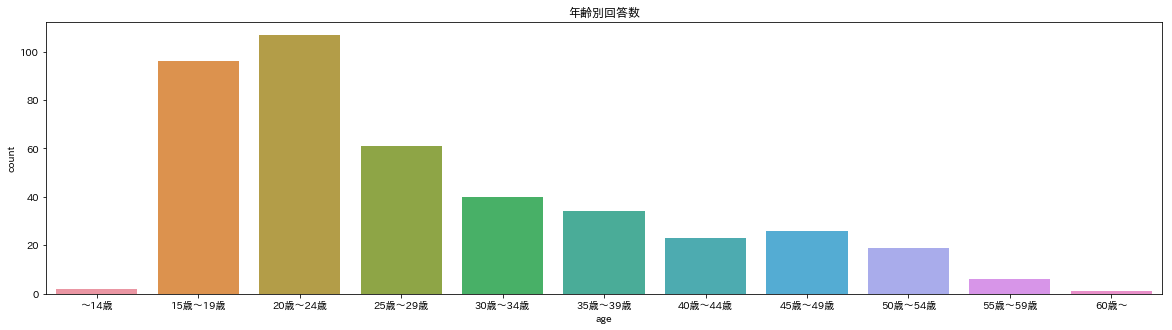

In [31]:
plt.title('年齢別回答数')
sns.countplot(x="age", data=df, order=['～14歳','15歳～19歳','20歳～24歳','25歳～29歳',
                                       '30歳～34歳','35歳～39歳','40歳～44歳','45歳～49歳',
                                       '50歳～54歳','55歳～59歳','60歳～'])

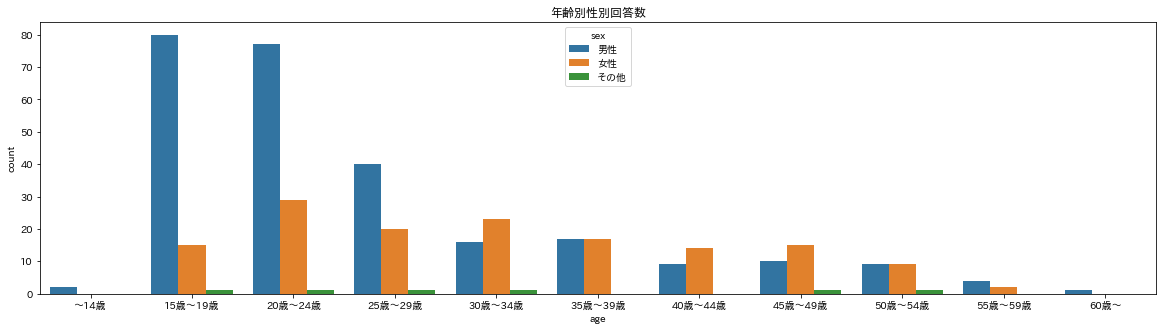

In [32]:
plt.title('年齢別性別回答数')
sns.countplot(x="age", hue="sex", data=df, hue_order=['男性','女性','その他'],
              order=['～14歳','15歳～19歳','20歳～24歳','25歳～29歳',
                    '30歳～34歳','35歳～39歳','40歳～44歳','45歳～49歳',
                    '50歳～54歳','55歳～59歳','60歳～'])

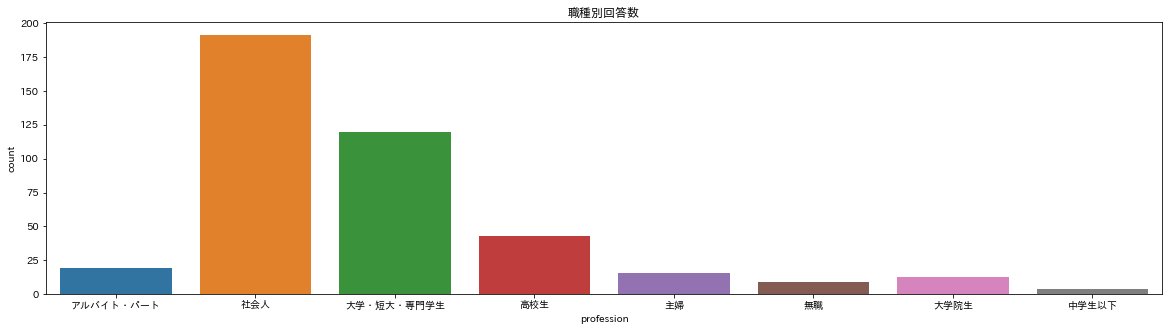

In [33]:
plt.title('職種別回答数')
sns.countplot(x="profession", data=df)

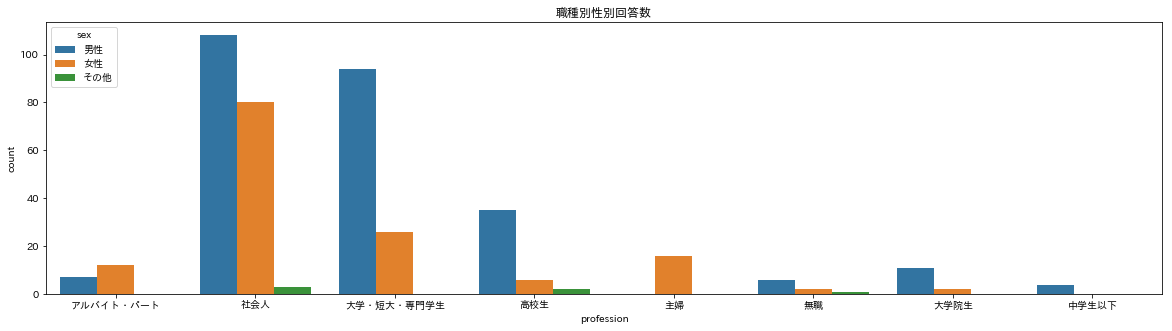

In [34]:
plt.title('職種別性別回答数')
sns.countplot(x="profession", hue="sex", data=df, hue_order=['男性','女性','その他'])

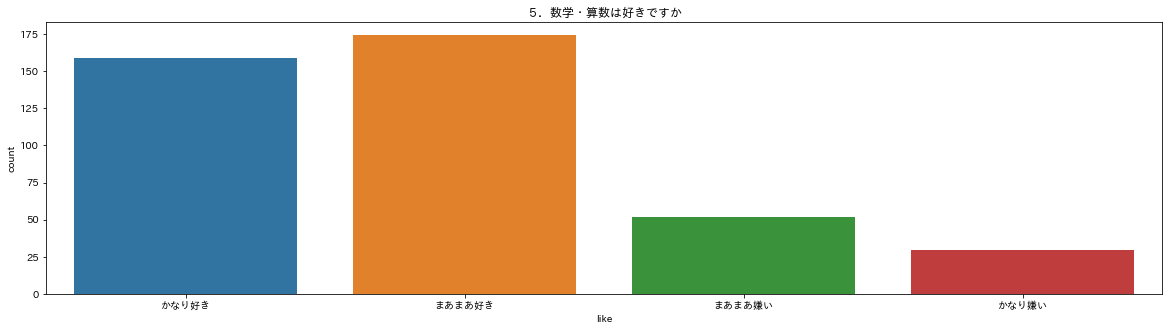

In [35]:
plt.title('５．数学・算数は好きですか')
sns.countplot(x="like", data=df, order=['かなり好き','まあまあ好き','まあまあ嫌い','かなり嫌い'])

In [36]:
def cnt2per(df, conditions, col):
    tmp = df[conditions][col].value_counts()
    tmp = tmp.map(lambda x:x/tmp.sum())
    return tmp

５．数学・算数は好きですか <性別>


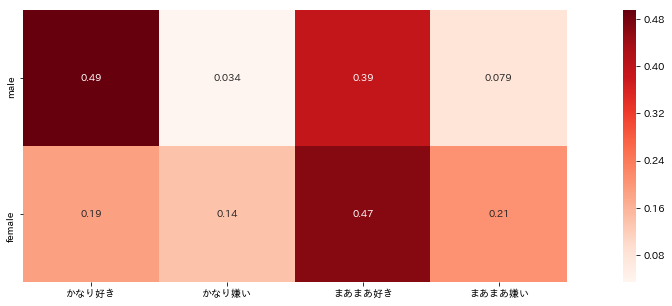

In [37]:
# - split sex
print('５．数学・算数は好きですか', '<性別>')
tmp = pd.concat([cnt2per(df, df['sex']=='男性', 'like').rename('male'),
                 cnt2per(df, df['sex']=='女性', 'like').rename('female')], sort=True, axis=1)
sns.heatmap(tmp.T, annot=True, square=True, cmap='Reds')

５．数学・算数は好きですか <性別, 年齢別>


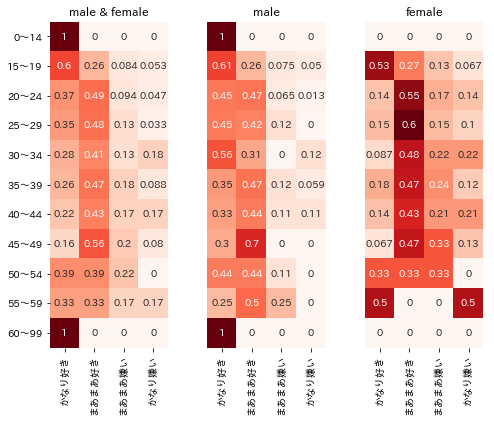

In [38]:
# - split age & sex
print('５．数学・算数は好きですか', '<性別, 年齢別>')

tmp_all = pd.DataFrame(index=like_order)
for age, i in zip(age_order, age_int_order):
    tmp = cnt2per(df.query("sex!='その他'"),
                  df.query("sex!='その他'")['age']==age, 'like').rename(i)
    tmp_all = tmp_all.join(tmp)

tmp_male = pd.DataFrame(index=like_order)
for age, i in zip(age_order, age_int_order):
    tmp = cnt2per(df.query("sex=='男性'"),
                  df.query("sex=='男性'")['age']==age, 'like').rename(i)
    tmp_male = tmp_male.join(tmp)
    
tmp_female = pd.DataFrame(index=like_order)
for age, i in zip(age_order, age_int_order):
    tmp = cnt2per(df.query("sex=='女性'"),
                  df.query("sex=='女性'")['age']==age, 'like').rename(i)
    tmp_female = tmp_female.join(tmp)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))
axes[0].set(title='male & female')
sns.heatmap(tmp_all.T.fillna(0), cmap='Reds', annot=True, square=True, cbar=False, ax=axes[0])
axes[1].set(title='male')
sns.heatmap(tmp_male.T.fillna(0), cmap='Reds', annot=True, square=True, cbar=False, yticklabels=False, ax=axes[1])
axes[2].set(title='female')
sns.heatmap(tmp_female.T.fillna(0), cmap='Reds', annot=True, square=True, cbar=False, yticklabels=False, ax=axes[2])

５．数学・算数は好きですか <職種別>


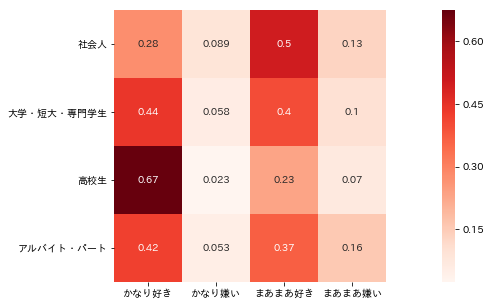

In [39]:
# - split job
print('５．数学・算数は好きですか', '<職種別>')
tmp = pd.concat([cnt2per(df, df['profession']==job, 'like').rename(job).sort_index()\
                for job in df['profession'].value_counts()[:4].index],
               sort=True, axis=1)
sns.heatmap(tmp.T, annot=True, square=True, cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
like,,,,,,,,
かなり好き,159.0,10.006289,10.585694,0.0,3.0,6.0,11.0,31.0
かなり嫌い,30.0,1.400000,5.611564,0.0,0.0,0.0,1.0,31.0
まあまあ好き,174.0,4.045977,6.509944,0.0,1.0,1.0,6.0,31.0
まあまあ嫌い,52.0,2.076923,4.841998,0.0,0.0,0.0,3.0,31.0


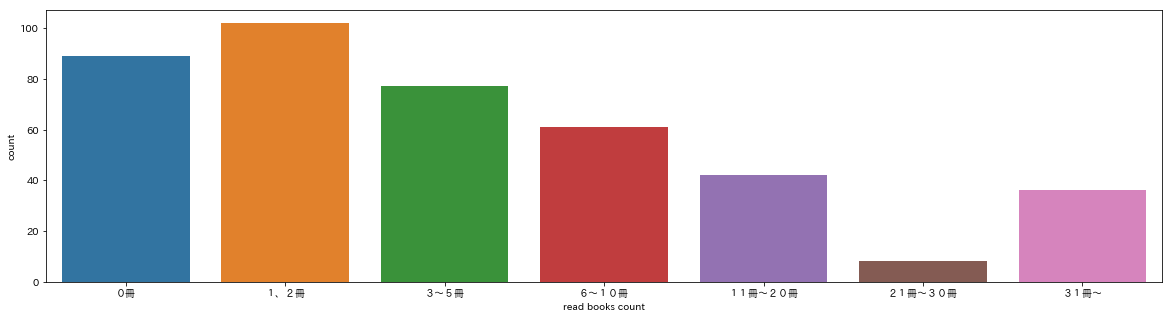

In [40]:
# - split read books count
display(sns.countplot(x="read books count", data=df, order=book_order))
display(df.groupby(['like'])['min_read_books_count'].describe())

In [41]:
print('めっちゃ参考書読んでるけど嫌いなやつ')
df.query("(like=='かなり嫌い' | like=='まあまあ嫌い') & min_read_books_count==31").loc[:,['sex','age','like',
                                                                                           'read books count',
                                                                                           'when do you dislike', 
                                                                                           'what started you like or dislike']]

めっちゃ参考書読んでるけど嫌いなやつ


,sex,age,like,read books count,when do you dislike,what started you like or dislike
10,女性,45歳～49歳,まあまあ嫌い,３１冊～,2_中学生前半,物心がついたときから・気が付いたら
226,男性,20歳～24歳,かなり嫌い,３１冊～,6_高校卒業後の進学先で（大学・専門学校など）,学校の授業がきっかけ


In [42]:
print('参考書読んでないけど好きなやつ')
df.query("(like=='かなり好き') & min_read_books_count==0").loc[:,['sex','age','like',
                                                                   'read books count',
                                                                   'when did you like', 
                                                                   'what started you like or dislike']]

参考書読んでないけど好きなやつ


,sex,age,like,read books count,when did you like,what started you like or dislike
71,男性,30歳～34歳,かなり好き,０冊,1_小学校時代の算数の時から,問題を解くのが楽しかったから
79,男性,30歳～34歳,かなり好き,０冊,5_高校生後半,塾の先生がきっかけ
137,女性,30歳～34歳,かなり好き,０冊,1_小学校時代の算数の時から,物心がついたときから・気が付いたら
176,女性,15歳～19歳,かなり好き,０冊,4_高校生前半,学校の先生がきっかけ
198,女性,35歳～39歳,かなり好き,０冊,1_小学校時代の算数の時から,物心がついたときから・気が付いたら
238,男性,15歳～19歳,かなり好き,０冊,4_高校生前半,テストの点数など
268,男性,45歳～49歳,かなり好き,０冊,1_小学校時代の算数の時から,塾の授業がきっかけ
316,男性,15歳～19歳,かなり好き,０冊,0_小学校入学以前から,本や番組などがきっかけ
317,男性,15歳～19歳,かなり好き,０冊,2_中学生前半,物心がついたときから・気が付いたら
388,女性,35歳～39歳,かなり好き,０冊,1_小学校時代の算数の時から,物心がついたときから・気が付いたら


In [43]:
# - 回答した時点での年齢で割った読んだ数をlikeでグループ化した統計
df.groupby(['like'])['age_div_read_books_count'].describe()

,count,mean,std,min,25%,50%,75%,max
like,,,,,,,,
かなり好き,148.0,6.109855,7.382166,0.451613,1.612903,3.181818,6.666667,40.0
かなり嫌い,12.0,28.387097,14.710816,0.645161,15.000000,32.500000,40.000000,45.0
まあまあ好き,142.0,13.450601,11.328806,0.645161,5.000000,10.000000,20.000000,55.0
まあまあ嫌い,24.0,16.449373,13.610618,1.363636,7.291667,13.333333,20.000000,50.0


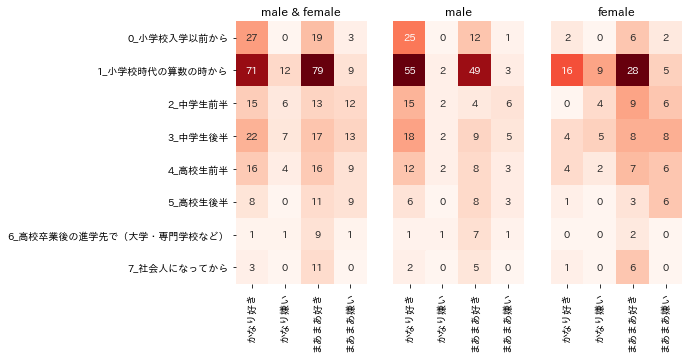

In [44]:
# - split 時期 & sex
tmp = pd.concat([df.loc[:,['like', 'when did you like']].dropna().rename(columns={'when did you like':'when'}),
                 df.loc[:,['like', 'when do you dislike']].dropna().rename(columns={'when do you dislike':'when'})])
tmp = pd.concat([tmp[tmp['when']==i]['like'].value_counts().rename(i).sort_index() for i in tmp.when.unique()[::-1]], sort=True, axis=1)
tmp_all = tmp.fillna(0)

tmp = pd.concat([df.query("sex=='男性'").loc[:,['like', 'when did you like']].dropna().rename(columns={'when did you like':'when'}),
           df.query("sex=='男性'").loc[:,['like', 'when do you dislike']].dropna().rename(columns={'when do you dislike':'when'})])
tmp = pd.concat([tmp[tmp['when']==i]['like'].value_counts().rename(i).sort_index() for i in tmp.when.unique()[::-1]], sort=True, axis=1)
tmp_male = tmp.fillna(0)

tmp = pd.concat([df.query("sex=='女性'").loc[:,['like', 'when did you like']].dropna().rename(columns={'when did you like':'when'}),
           df.query("sex=='女性'").loc[:,['like', 'when do you dislike']].dropna().rename(columns={'when do you dislike':'when'})])
tmp = pd.concat([tmp[tmp['when']==i]['like'].value_counts().rename(i).sort_index() for i in tmp.when.unique()[::-1]], sort=True, axis=1)
tmp_female = tmp.fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))
axes[0].set(title='male & female')
sns.heatmap(tmp_all.T.sort_index(axis=0), cmap='Reds', annot=True, square=True, cbar=False, ax=axes[0])
axes[1].set(title='male')
sns.heatmap(tmp_male.T.sort_index(axis=0), cmap='Reds', annot=True, square=True, cbar=False, yticklabels=False, ax=axes[1])
axes[2].set(title='female')
sns.heatmap(tmp_female.T.sort_index(axis=0), cmap='Reds', annot=True, square=True, cbar=False, yticklabels=False, ax=axes[2])

好きor嫌いになったタイミング 件数


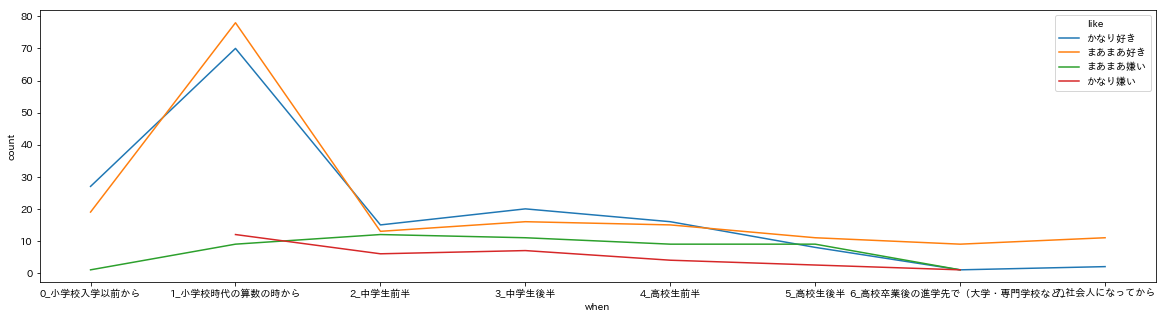

In [45]:
def getWhenCnt(df, group, target):
    df = df.groupby(group).count().reset_index()\
            .loc[:, group+[target]]\
            .rename(columns={target: 'count'})
    return df

tmp = pd.concat([getWhenCnt(df.query("like=='かなり好き' | like=='まあまあ好き'"),
                    ['when did you like', 'like'],
                    'sex').rename(columns={'when did you like': 'when'}),
                 getWhenCnt(df.query("like=='かなり嫌い' | like=='まあまあ嫌い'"),
                    ['when do you dislike', 'like'],
                    'sex').rename(columns={'when do you dislike': 'when'})]
                ).sort_values(["when"])
print('好きor嫌いになったタイミング 件数')
display(sns.lineplot(x="when", y="count", sort=False, hue="like", data=tmp))

好きor嫌いになったタイミング 割合


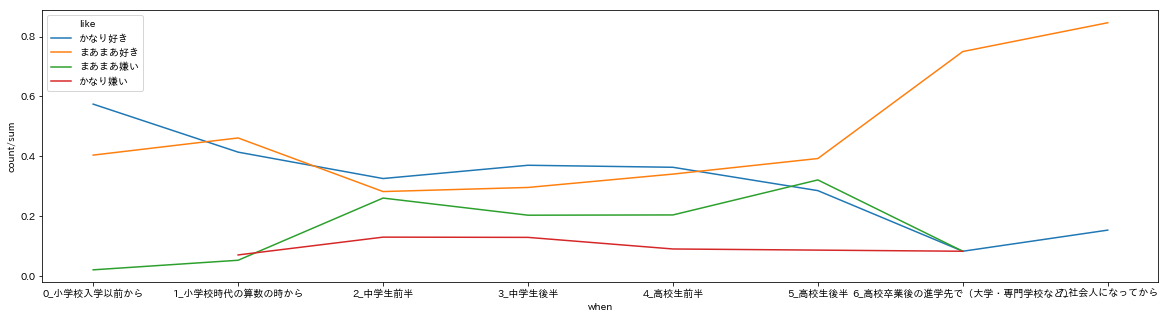

In [46]:
print('好きor嫌いになったタイミング 割合')
tmp = pd.merge(tmp, pd.DataFrame(tmp.groupby('when')['count'].sum().rename('sum')), on='when')
tmp['count/sum'] = tmp['count']/ tmp['sum']
sns.lineplot(x="when", y="count/sum", sort=False, hue="like", data=tmp)

In [47]:
# cnt = np.hstack([df['when did you like'].value_counts().sort_index().values, 
#                  df['when do you dislike'].value_counts().sort_index().values])
# opportunity = np.array(list(df['when did you like'].value_counts().sort_index().index) +\
#                        list(df['when do you dislike'].value_counts().sort_index().index))
# like = np.array(['like' for _ in range(8)] + ['dislike' for _ in range(8)])

# tmp_df = pd.DataFrame(np.vstack([opportunity, like, cnt])).T
# tmp_df.columns = ['opportunity', 'like', 'count']
# tmp_df= tmp_df.astype({'count':'int64'})
# tmp_df = tmp_df.sort_values('opportunity')
# sns.lineplot(x="opportunity", y="count",sort=False, hue="like", data=tmp_df)

In [48]:
# -  mast fun all top10
pd.DataFrame(df['most fun'].value_counts()[:10])

,most fun
微分・積分,73
確率・組み合わせ,56
特にない,49
平面幾何,38
方程式・不等式,32
関数,31
計算問題,29
集合・論理,25
数列,23
三角比・三角関数,18


In [49]:
# -  mast fun like top10
pd.DataFrame(df.query("like=='かなり好き'|like=='まあまあ好き'")['most fun'].value_counts()[:10])

,most fun
微分・積分,72
確率・組み合わせ,47
関数,29
平面幾何,29
方程式・不等式,24
数列,21
集合・論理,21
計算問題,20
特にない,18
三角比・三角関数,16


In [32]:
# -  mast fun dislike top10
pd.DataFrame(df.query("like=='かなり嫌い'|like=='まあまあ嫌い'")['most fun'].value_counts()[:10])

,most fun
特にない,31
確率・組み合わせ,9
計算問題,9
平面幾何,9
方程式・不等式,8
集合・論理,4
ベクトル,2
関数,2
三角比・三角関数,2
数列,2


In [33]:
tmp = pd.DataFrame(index=units)
tmp_likes_fun = df[df['most fun'].isin(units)].query("like=='かなり好き'|like=='まあまあ好き'")['most fun'].value_counts().rename('likes_fun')
tmp_dislikes_fun = df[df['most fun'].isin(units)].query("like=='かなり嫌い'|like=='まあまあ嫌い'")['most fun'].value_counts().rename('dislikes_fun')
tmp_likes_difficult = df[df['most difficult'].isin(units)].query("like=='かなり好き'|like=='まあまあ好き'")['most difficult'].value_counts().rename('likes_difficult')
tmp_dislikes_difficult = df[df['most difficult'].isin(units)].query("like=='かなり嫌い'|like=='まあまあ嫌い'")['most difficult'].value_counts().rename('dislikes_difficult')
for df_i in [tmp_likes_fun, tmp_dislikes_fun, tmp_likes_difficult, tmp_dislikes_difficult]:
    tmp = pd.merge(tmp, pd.DataFrame(df_i), left_index=True, right_index=True, how='outer')
    
tmp.sort_values(['likes_fun'], ascending=False)

,likes_fun,dislikes_fun,likes_difficult,dislikes_difficult
微分・積分,72,1,43,15
確率・組み合わせ,47,9,54,13
平面幾何,29,9,53,6
関数,29,2,7,8
方程式・不等式,24,8,4,3
数列,21,2,20,3
集合・論理,21,4,22,2
計算問題,20,9,23,4
三角比・三角関数,16,2,8,10
ベクトル,8,2,35,3


In [34]:
# 例外
exceptions = []
exceptions += (list(df[(df['like']==3) | (df['like']==4)]['when do you dislike'].dropna().index))
exceptions += (list(df[(df['like']==1) | (df['like']==2)]['when did you like'].dropna().index))
exceptions += (list(df[df['learn again']=='まったく思わない']['how much do you want to learn'].dropna().index))

print(exceptions)
#ex
# df[df.index==322] # like=4 AND 'when do you dislike'='社会人になってから'

[]


In [54]:
val_cnt = {}
for col in df.columns:
    val_cnt[col] = df[col].value_counts()

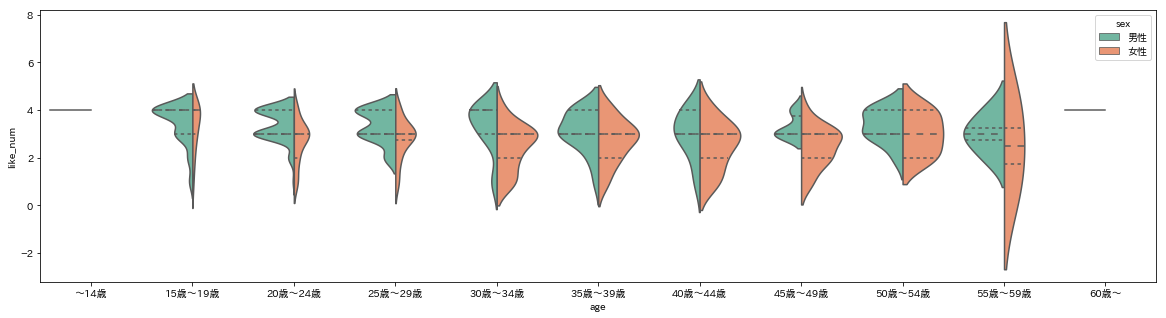

In [63]:
ax = sns.violinplot(x="age", y="like_num", hue="sex", hue_order= ['男性', '女性'],
                    data=df[~(df['sex']=='その他')], palette="Set2", split=True,
                    scale="count", inner="quartiles", order=age_order)

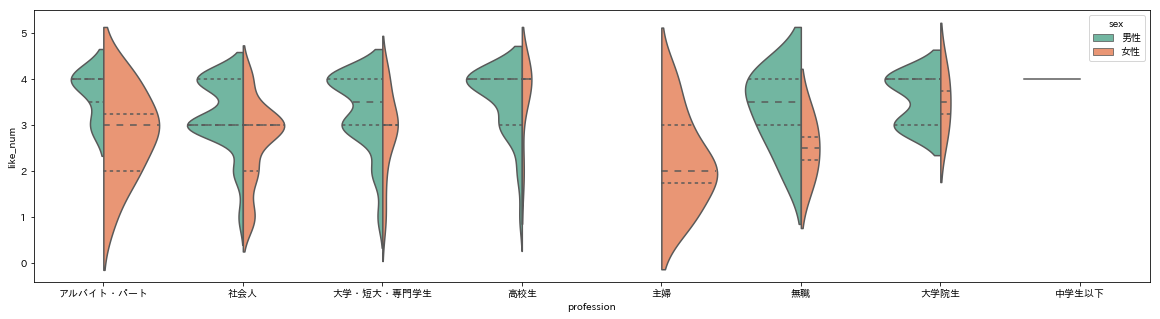

In [65]:
ax = sns.violinplot(x="profession", y="like_num", hue="sex", hue_order= ['男性', '女性'],
                    data=df[~(df['sex']=='その他')], palette="Set2", split=True,
                    scale="count", inner="quartiles")

In [92]:
print('詳細な好きになったきっかけ')
display(pd.DataFrame(df.loc[df['like_num'].isin([3,4])]['what started you like or dislike'].value_counts()[:5].rename('count')))
print('詳細な嫌いになったきっかけ')
display(pd.DataFrame(df.loc[df['like_num'].isin([1,2])]['what started you like or dislike'].value_counts()[:5].rename('count')))

詳細な好きになったきっかけ


,count
物心がついたときから・気が付いたら,117
学校の授業がきっかけ,41
本や番組などがきっかけ,36
テストの点数など,32
学校の先生がきっかけ,29


詳細な嫌いになったきっかけ


,count
学校の授業がきっかけ,38
テストの点数など,22
物心がついたときから・気が付いたら,10
学校の先生がきっかけ,3
親や兄弟がきっかけ,3


In [90]:
print('詳細な好きになったきっかけ')
display(pd.DataFrame(df.loc[df['like_num'].isin([3,4])]['how you became fond or dislike'].value_counts()[:5].rename('count')))

print('詳細な嫌いになったきっかけ')
display(pd.DataFrame(df.loc[df['like_num'].isin([3,4])]['how you became fond or dislike'].value_counts()[:5].rename('count')))

詳細な好きになったきっかけ


,count
小学校までは簡単すぎてつまらなかったが、中学生になり解の公式や因数分解などがおもしろくなり、さらに高校でレベルアップしておもしろくなった(数学は好きだが、すごく得意というわけではない),1
そろばんを習ってある程度計算できるようになってから楽しくなりました。,1
小6の春休みに中学1年になるまで暇だなぁと思い数学の教科書に手を出し、わからないところは塾の先生に聞きながら進めて、理解するのできる感覚が楽しかったから。,1
理屈を考えるのが楽しかった,1
母親が公文式の教室を開いていて生徒と一緒に解いていた,1


詳細な嫌いになったきっかけ


,count
小学校までは簡単すぎてつまらなかったが、中学生になり解の公式や因数分解などがおもしろくなり、さらに高校でレベルアップしておもしろくなった(数学は好きだが、すごく得意というわけではない),1
そろばんを習ってある程度計算できるようになってから楽しくなりました。,1
小6の春休みに中学1年になるまで暇だなぁと思い数学の教科書に手を出し、わからないところは塾の先生に聞きながら進めて、理解するのできる感覚が楽しかったから。,1
理屈を考えるのが楽しかった,1
母親が公文式の教室を開いていて生徒と一緒に解いていた,1


In [91]:
# study                               １６．主に、どのような方法で数学を勉強していましたか。
print('数学が好きな人の学習方法')
display(pd.DataFrame(df.loc[df['like_num'].isin([3,4])]['study'].value_counts()[:5].rename('count')))

print('数学が嫌いな人の学習方法')
display(pd.DataFrame(df.loc[df['like_num'].isin([1,2])]['study'].value_counts()[:5].rename('count')))

数学が好きな人の学習方法


,count
"授業を聞いて, 問題集を解いて",88
問題集を解いて,49
"授業を聞いて, 問題集を解いて, 数学の本（教科書、参考書を除く）を読んで",44
"授業を聞いて, 問題集を解いて, 数学の本（教科書、参考書を除く）を読んで, 人から個別に聞いて",25
授業を聞いて,22


数学が嫌いな人の学習方法


,count
"授業を聞いて, 問題集を解いて",27
授業を聞いて,19
"授業を聞いて, 問題集を解いて, 数学の本（教科書、参考書を除く）を読んで",9
"授業を聞いて, 問題集を解いて, 人から個別に聞いて",8
"授業を聞いて, 問題集を解いて, 数学の本（教科書、参考書を除く）を読んで, 人から個別に聞いて",4
